# Onboarding Day 2 - NYC High School Directory Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

**Q**: Load the dataset using pandas

In [2]:
df = pd.read_csv('high-school-directory.csv')
df.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


**Q**: Clean column names (lowercase, replace spaces with underscores & remove special characters)

In [3]:
df.columns = (
    df.columns
      .str.lower()                                 # lowercase
      .str.replace(' ', '_')                       # replace spaces with underscores
      .str.replace(r'[^a-z0-9_]', '', regex=True)  # remove all special characters
)

## Brooklyn Schools

**Q**: Filter the dataset to include only schools located in Brooklyn.

In [4]:
df_brooklyn = df[df['borough'] == 'Brooklyn']

**Q**: How many total schools are in Brooklyn?

**A**: There are **121** schools in Brooklyn.

In [5]:
total_schools_brooklyn = df_brooklyn['dbn'].nunique()
total_schools_brooklyn

121

**Q**: How many schools in Brooklyn offer Grade 9 entry?

**A**: All **121** schools in Brooklyn offer Grade 9.

In [6]:
brooklyn_schools_grade9 = df_brooklyn[
    (df_brooklyn['grade_span_min'] <= 9) & (df_brooklyn['grade_span_max'] >= 9)
    ]

brooklyn_schools_grade9_count = brooklyn_schools_grade9['dbn'].nunique()
brooklyn_schools_grade9_count

121

## Group and Summarize

**Q**: Count of schools per borough

In [7]:
school_count_by_borough = df.groupby('borough')['dbn'].nunique()
school_count_by_borough

borough
Bronx            118
Brooklyn         121
Manhattan        106
Queens            80
Staten Island     10
Name: dbn, dtype: int64

**Q**: Average number of students per borough

In [8]:
avg_students_by_borough = df.groupby('borough')['total_students'].mean()
avg_students_by_borough

borough
Bronx             490.406780
Brooklyn          699.134454
Manhattan         589.825243
Queens           1046.644737
Staten Island    1847.500000
Name: total_students, dtype: float64

**Q**: Summary of grade_span_max grouped by borough

In [9]:
df.groupby('borough')['grade_span_max'].describe()

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Bronx,118.0,11.906780,0.369506,9.0,12.0,12.0,12.0,12.0
Brooklyn,121.0,11.933884,0.381566,9.0,12.0,12.0,12.0,12.0
Manhattan,106.0,11.877358,0.472135,9.0,12.0,12.0,12.0,12.0
Queens,80.0,11.825000,0.497462,10.0,12.0,12.0,12.0,12.0
Staten Island,10.0,12.000000,0.000000,12.0,12.0,12.0,12.0,12.0


In [10]:
# Summary statistics of grade_span_min by borough to compare with grade_span_max
df.groupby('borough')['grade_span_min'].describe()

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Bronx,118.0,8.415254,1.193474,6.0,9.0,9.0,9.0,9.0
Brooklyn,121.0,8.429752,1.181993,6.0,9.0,9.0,9.0,9.0
Manhattan,104.0,8.480769,1.140437,6.0,9.0,9.0,9.0,9.0
Queens,80.0,8.387500,1.195919,6.0,9.0,9.0,9.0,9.0
Staten Island,9.0,9.000000,0.000000,9.0,9.0,9.0,9.0,9.0


💡 **Insights**: Staten Island has schools starting at grade 9 while the other borroughs have schools starting at grade 6. 

## Visualization

**Q**: Create visualizations (Bar chart) Number of schools per borough

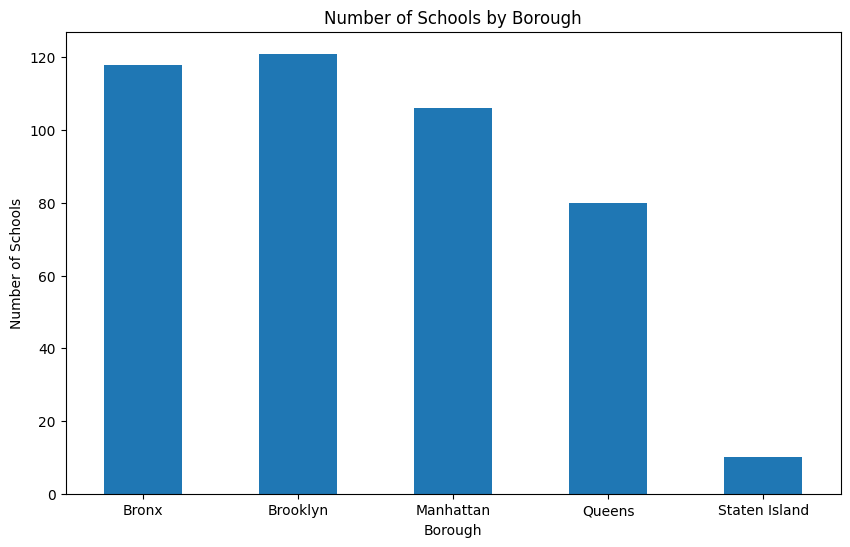

In [11]:
plt.figure(figsize=(10,6))
school_count_by_borough.plot(kind='bar')
plt.title('Number of Schools by Borough')
plt.xlabel('Borough')
plt.xticks(rotation=0)
plt.ylabel('Number of Schools')
plt.show()

💡 **Insights**: Brooklyn and the Bronx have the highest count of total schools overall but their average student count is lower compared to Queens and Staten Island.

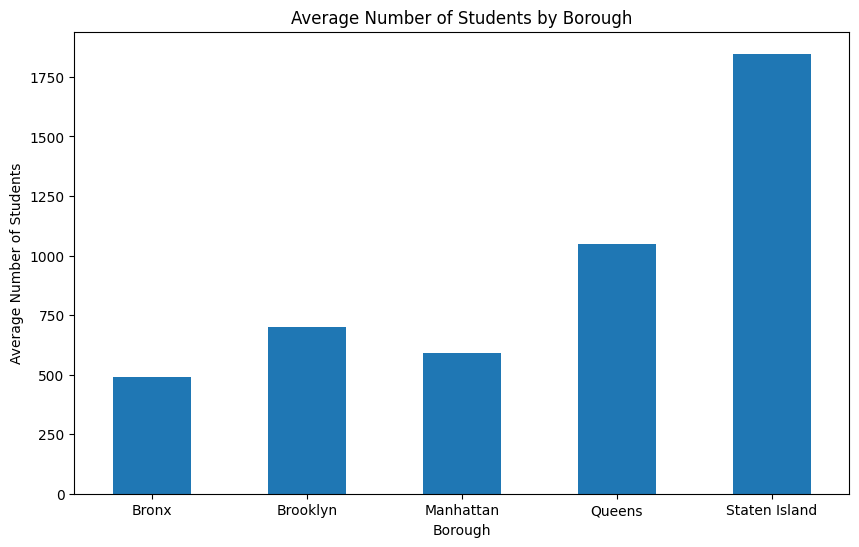

In [12]:
# Avg students plot
plt.figure(figsize=(10,6))
avg_students_by_borough.plot(kind='bar')
plt.title('Average Number of Students by Borough')
plt.xlabel('Borough')
plt.xticks(rotation=0)
plt.ylabel('Average Number of Students')
plt.show()

💡 **Insights**: Staten Island has the most average students but has the least amount of schools from all boroughs.

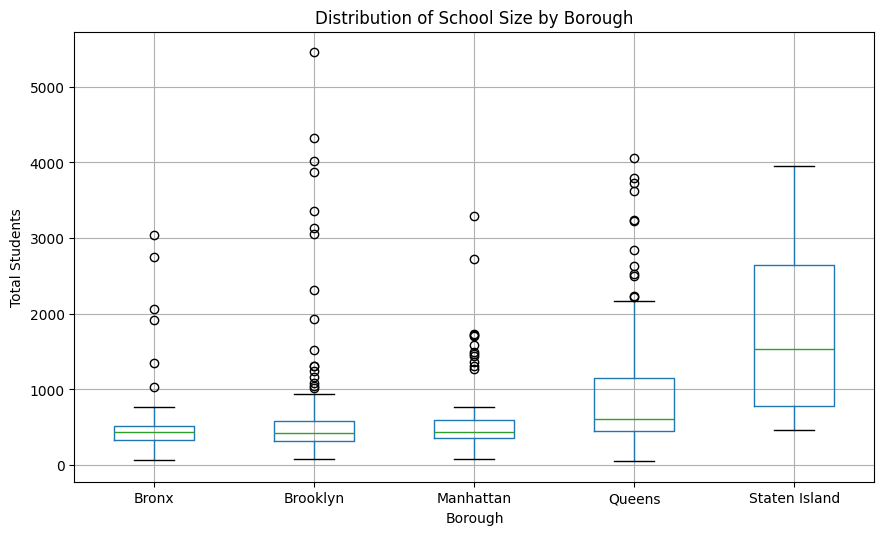

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
df.boxplot(column='total_students', by='borough', ax=ax)
ax.set_title('Distribution of School Size by Borough')
ax.set_xlabel('Borough')
ax.set_ylabel('Total Students')
plt.suptitle('') # remove extra title
plt.show()

💡 **Insight**: Staten Island schools have the largest student populations overall and show less variation compared to other boroughs, indicating fewer but consistently larger schools. Queens displays a wider spread of school sizes, while Bronx, Brooklyn, and Manhattan seem to have smaller schools and a few large outliers.

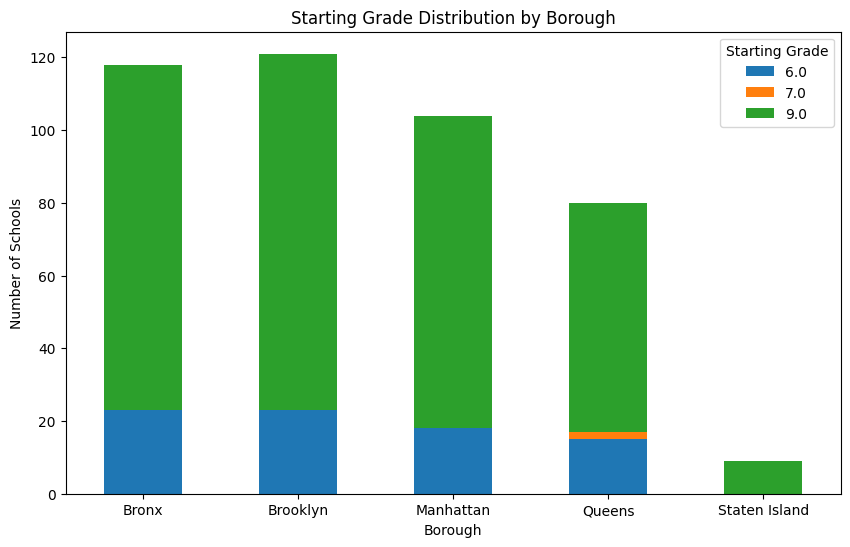

In [14]:
# Get the distribution of starting grades by borough
grade_start_dist = (
    df.groupby(['borough', 'grade_span_min'])['dbn']
      .nunique()
      .unstack(fill_value=0)
)

# Plot
ax = grade_start_dist.plot(kind='bar', stacked=True, figsize=(10,6))
ax.set_title('Starting Grade Distribution by Borough')
ax.set_xlabel('Borough')
ax.set_ylabel('Number of Schools')
ax.legend(title='Starting Grade')
plt.xticks(rotation=0)
plt.show()

💡 **Insights**: Staten Island stands out with all its schools starting at Grade 9. A small number of schools in Queens start at Grade 7, while the schools in the other boroughs have a mix of schoolst starting at Grade 6 and Grade 9.

# Insights

* **School Distribution**: Brooklyn and the Bronx have the largest number of schools overall, while Staten Island has the fewest schools.

* **Average Student Size**: Despite having the fewest schools, Staten Island has the highest average number of students per school, suggesting larger schools compared to the other boroughs. The Bronx and Brooklyn have the most schools but fewer average student, suggesting they have more but smaller schools compared to the other boroughs.

* **Grade Structure**: Staten Island schools all start at Grade 9, indicating there are exclusivly high schools in this dataset for this borough. The other boroughs include schools starting from Grade 6, indicating a mix of middle and high schools.